In [2]:
from tensorflow.keras.applications import MobileNetV2# type: ignore
from tensorflow.keras.models import Model# type: ignore
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D# type: ignore
from tensorflow.keras.optimizers import Adam# type: ignore
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory# type: ignore


In [5]:
train_data_dir = r'D:\datasets\flowers\train'
validation_data_dir = r'D:\datasets\flowers\validation'

In [6]:
#data generators
train_generator = image_dataset_from_directory(
    train_data_dir,
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)

validation_generator = image_dataset_from_directory(
    validation_data_dir,
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)



Found 1190 files belonging to 17 classes.
Found 170 files belonging to 17 classes.


In [7]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(17, activation='softmax')(x) s

model = Model(inputs=base_model.input, outputs=predictions)

In [8]:
for layer in base_model.layers:
    layer.trainable = False

for layer in base_model.layers[-30:]:  
    layer.trainable = True


In [9]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
# fine-tune the model
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.1800 - loss: 2.6792 - val_accuracy: 0.0882 - val_loss: 3.0142
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 35s 928ms/step - accuracy: 0.6944 - loss: 1.2527 - val_accuracy: 0.1059 - val_loss: 3.0824
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 35s 923ms/step - accuracy: 0.8588 - loss: 0.6512 - val_accuracy: 0.1176 - val_loss: 3.0905
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 36s 943ms/step - accuracy: 0.9527 - loss: 0.3275 - val_accuracy: 0.1176 - val_loss: 3.0065
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 36s 951ms/step - accuracy: 0.9841 - loss: 0.1815 - val_accuracy: 0.1294 - val_loss: 3.0466
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 37s 966ms/step - accuracy: 0.9961 - loss: 0.0959 - val_accuracy: 0.1471 - val_loss: 2.9505
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 1.0000 - loss: 0.0498 - val_accuracy: 0.1471 - val_loss: 3.1146
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9994 - loss: 0.0407 - val_accuracy: 0.1

In [11]:
# Evaluate the model on the validation set
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 537ms/step - accuracy: 0.1599 - loss: 2.8643
Validation Loss: 2.910585641860962
Validation Accuracy: 0.15882353484630585


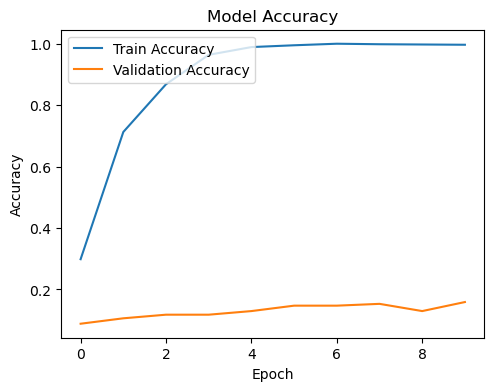

In [12]:
plt.figure(figsize=(12, 4))

# accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')


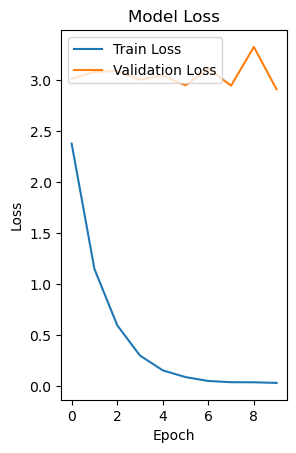

In [13]:
# loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

In [14]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>